# Статистический анализ тарифов

**Цель исследования** – выяснить, какой из двух тарифов ("Смарт" или "Ультра") лучше.

**Входные данные** представляют собой информацию о пользователях, звонках, сообщениях, интернет-сессиях и тарифах.

**План исследования**:
- открытие файлов с данными и ознакомление с ними;
- предобработка данных (приведение их к нужным типам и исправление ошибок, создание единого сводного датафрейма);
- анализ данных;
- проверка гипотез (гипотезы о равенстве средней выручке тарифов "Ультра" и "Смарт" и гипотезы о равенстве средней выручке пользователей из Москвы и других городов).

### Описание тарифов
#### Тариф «Смарт»
*Ежемесячная плата*: 550 рублей

Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика

##### Стоимость услуг сверх тарифного пакета:

*минута разговора*: 3 рубля

*сообщение*: 3 рубля

*1 Гб интернет-трафика*: 200 рублей
#### Тариф «Ультра»
*Ежемесячная плата*: 1950 рублей

Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика

##### Стоимость услуг сверх тарифного пакета:
*минута разговора*: 1 рубль

*сообщение*: 1 рубль

*1 Гб интернет-трафика*: 150 рублей


*Примечание*: «Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

## Открытие файла с данными и ознакомление с ним

Откроем файлы и ознакомися с ними.

In [1]:
# import 'pandas', 'numpy', 'matplotlib' 'scipy.stats' libraries
import pandas as pd
import numpy as np
import matplotlib as plt
from scipy import stats as st

In [2]:
# open files
path = '/Users/aleksandrdudakov/Downloads'
calls_data = pd.read_csv(path + '/calls.csv')
internet_data = pd.read_csv(path + '/internet.csv')
messages_data = pd.read_csv(path + '/messages.csv')
tariffs_data = pd.read_csv(path + '/tariffs.csv')
users_data = pd.read_csv(path + '/users.csv')

In [3]:
display(calls_data.head())
calls_data.info()
calls_data.describe()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


В датафрейме `calls_data` нужно изменить тип столбца `call_date` на 'datetime'.

In [4]:
display(internet_data.head())
internet_data.info()
internet_data.describe()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


В датафрейме `internet_data` нужно удалить столбец `Unnamed: 0` (видимо, этот столбец повторяет нумерцию строк), а также изменить тип столбца `session_date` на 'datetime'.

In [5]:
display(messages_data.head())
messages_data.info()
messages_data.describe()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


В датафрейме `messages_data` нужно изменить тип столбца `message_date` на 'datetime'.

In [6]:
display(tariffs_data)
tariffs_data.info()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [7]:
display(users_data.head())
users_data.info()
users_data.describe()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


### Вывод

Мы ознакомились с данными и нашли в них ошибки (неверный тип данных и лишний столбец).

## Подготовка данных

### Обработка дубликатов

Посчитаем количество дубликатов в датафреймах.

In [8]:
# display number of duplicates
display(calls_data.duplicated().sum() + messages_data.duplicated().sum() + internet_data.duplicated().sum() + users_data.duplicated().sum()) 

0

Дубликаты не обнаружены.

### Приведение данных к нужным типам

Изменим тип столбцы `call_date` в датафрейме `calls_data`, `session_date` в датафрейме `internet_data` и `message_date` в датафрейме `messages_data` на 'datetime'.

In [9]:
# change type of 'call_date', 'session_date' and 'message_date' columns to 'datetime'
calls_data['call_date'] = pd.to_datetime(calls_data['call_date'], format='%Y-%m-%d')
internet_data['session_date'] = pd.to_datetime(internet_data['session_date'], format='%Y-%m-%d')
messages_data['message_date'] = pd.to_datetime(messages_data['message_date'], format='%Y-%m-%d')

Проверим.

In [10]:
# general information about 'calls_data'
calls_data.info()
internet_data.info()
messages_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  float64       
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), objec

Также округлим вверх и изменим тип данных столбца `duration` датафрейма `calls_data`, так как это нам понадобится при склеивании всех датафреймов.

In [11]:
# round up 'duration' column
calls_data['duration'] = np.ceil(calls_data['duration'])
# change type of 'duration' column to 'int'
calls_data['duration'] = calls_data['duration'].astype('int')

Проверим.

In [12]:
calls_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int64         
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB


### Исправление ошибок

Проверим, что в датафрейме `internet_data` значения столбца `Unnamed: 0` совпадают с индексом.

In [13]:
# difference between number of rows where column 'Unnamed: 0' equals row index and length of dataframe
internet_data[internet_data['Unnamed: 0'] == internet_data.index]['Unnamed: 0'].count() - len(internet_data)

0

Действительно, этот столец дублирует индекс. Удалим его.

In [14]:
import warnings
warnings.filterwarnings('ignore')
internet_data = internet_data.drop('Unnamed: 0', 1)

Проверим.

In [15]:
# general information about 'internet_data'
internet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB


Построим гистограмму использованного интернет-траффика.

<AxesSubplot:>

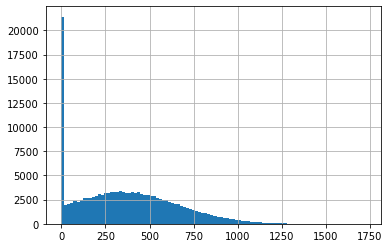

In [16]:
# plot histogram of 'mb_used' column
internet_data['mb_used'].hist(bins=100)

Много аномальных нулевых значений. Посчитаем их долю.

In [17]:
# rate of zero values
len(internet_data[internet_data['mb_used'] == 0]) / len(internet_data)

0.13118155773916304

Удалим эти значения, так как их не сильно много и они не понадобятся нам в исследовании.

In [18]:
internet_data = internet_data.drop(internet_data[internet_data['mb_used'] == 0].index)

Проверим.

<AxesSubplot:>

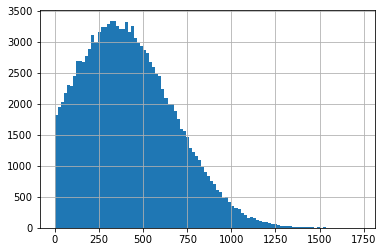

In [19]:
# plot histogram of 'mb_used' column
internet_data['mb_used'].hist(bins=100)

Аномалий нет: распределение нормальное.

### Расчет значений по месяцам

Расчитаем значения количества и длительности звонков, количества использованного трафика, количества сообщения для каждого пользователя по месяцам. 

Для этого сначала создадим сводные таблицы и объединим их.


In [20]:
# add new 'month' columns to dataframes
calls_data['month'] = calls_data['call_date'].dt.month
internet_data['month'] = internet_data['session_date'].dt.month
messages_data['month'] = messages_data['message_date'].dt.month

# create pivot tables
calls_pivot = calls_data.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum'])
internet_pivot = internet_data.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')
messages_pivot = messages_data.pivot_table(index=['user_id', 'month'], values='message_date', aggfunc='count')

# merge pivot tables
df = calls_pivot.join([internet_pivot, messages_pivot], how='outer')

#rename columns
df.columns=['calls_number', 'calls_duration', 'mb_used', 'messages_number']

# reset index
df = df.reset_index()

# add new dataframe with only 'user_id' and 'tariff' columns
tariffs_data = users_data[['user_id', 'city', 'tariff']]

# merge dataframes
df = df.merge(tariffs_data, on='user_id')

In [21]:
display(df.head())
df.info()

,user_id,month,calls_number,calls_duration,mb_used,messages_number,city,tariff
0,1000,5,22.0,159.0,2253.49,22.0,Краснодар,ultra
1,1000,6,43.0,172.0,23233.77,60.0,Краснодар,ultra
2,1000,7,47.0,340.0,14003.64,75.0,Краснодар,ultra
3,1000,8,52.0,408.0,14055.93,81.0,Краснодар,ultra
4,1000,9,58.0,466.0,14568.91,57.0,Краснодар,ultra


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          3214 non-null   int64  
 1   month            3214 non-null   int64  
 2   calls_number     3174 non-null   float64
 3   calls_duration   3174 non-null   float64
 4   mb_used          3201 non-null   float64
 5   messages_number  2717 non-null   float64
 6   city             3214 non-null   object 
 7   tariff           3214 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 226.0+ KB


Пропуски в столцах `mb_used` и `messages_number` означают, что в этот месяц соответсвенной услугой не пользовались. Заполним эти пропуски нулями.

In [22]:
# filling missing values in 'calls_number', 'calls_duration', 'mb_used' and 'messages_number' columns with zero
df['calls_number'] = df['calls_number'].fillna(0)
df['calls_duration'] = df['calls_duration'].fillna(0)
df['mb_used'] = df['mb_used'].fillna(0)
df['messages_number'] = df['messages_number'].fillna(0)

Проверим.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          3214 non-null   int64  
 1   month            3214 non-null   int64  
 2   calls_number     3214 non-null   float64
 3   calls_duration   3214 non-null   float64
 4   mb_used          3214 non-null   float64
 5   messages_number  3214 non-null   float64
 6   city             3214 non-null   object 
 7   tariff           3214 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 226.0+ KB


In [24]:
# Комментарий ревьюера
df.user_id.unique().shape

(498,)

Посчитаем помесячную выручку с каждого пользователя.

In [25]:
def mb_to_gb(value):
    '''
    Changes mb to gb rounded up.
    '''
    return np.ceil(value / 1024)

# add 'gb_used' columns
df['gb_used'] = df['mb_used'].apply(mb_to_gb)

# change type of 'calls_number', 'messages_number' and 'gb_used' columns to 'int'
df['calls_number'] = df['calls_number'].astype('int') 
df['messages_number'] = df['messages_number'].astype('int') 
df['gb_used'] = df['gb_used'].astype('int')

def calculate_monthly_revenue(row):
    '''
    Calculates monthly revenue.
    '''
    res = 0
    if row['tariff'] == 'smart':
        res += 550
        if row['calls_duration'] > 500:
            res += (row['calls_duration'] - 500) * 3
        if row['messages_number'] > 50:
            res += (row['messages_number'] - 50) * 3
        if row['gb_used'] > 15:
            res += (row['gb_used'] - 15) * 200
        return res
    if row['tariff'] == 'ultra':
        res += 1950
        if row['calls_duration'] > 3000:
            res += (row['calls_duration'] - 500) * 1
        if row['messages_number'] > 1000:
            res += (row['messages_number'] - 50) * 1
        if row['gb_used'] > 30:
            res += (row['gb_used'] - 15) * 150
        return res
    
    

df['monthly_revenue'] = df.apply(calculate_monthly_revenue , axis=1)

Проверим.

In [26]:
df.sample(5)

,user_id,month,calls_number,calls_duration,mb_used,messages_number,city,tariff,gb_used,monthly_revenue
2625,1409,8,117,846.0,21225.05,39,Набережные Челны,smart,21,2788.0
2062,1325,10,58,380.0,22108.22,15,Новосибирск,ultra,22,1950.0
1817,1286,11,9,47.0,4829.56,12,Москва,smart,5,550.0
1730,1274,5,69,493.0,16226.63,69,Волгоград,smart,16,807.0
2686,1419,10,69,465.0,11087.57,41,Новороссийск,smart,11,550.0


Удалим столбец `mb_used`.

In [27]:
# delete 'mb_used' column
df = df.drop('mb_used', 1)

### Вывод

Данные были подготовлены к анализу: были исправлены ошибки (столбцы приведены к нужным типам, лишние столбцы удалены), из пяти данных датафреймов был создан один сводный, готовый к анализу. Для каждого пользователя была расчитана помесячная выручка.

## Анализ данных

Посчитаем среднее, дисперсию и стандартное отклонение количества минут разговора, сообщений и интернет-траффика в месяц.

In [28]:
# create pivot table of average, variance and standard deviation of calls duration, messages number and gb used for every tariff
stat_pivot = df.pivot_table(index='tariff', values=['calls_duration', 'messages_number', 'gb_used'], aggfunc=['mean', 'var', 'std'])
stat_pivot

mean                                       var             \
       calls_duration    gb_used messages_number calls_duration    gb_used   
tariff                                                                       
smart      417.934948  16.328847       33.384029   36219.315784  33.028705   
ultra      526.623350  19.494416       49.363452  100873.633397  97.091686   

                                  std                            
       messages_number calls_duration   gb_used messages_number  
tariff                                                           
smart       796.812958     190.313730  5.747061       28.227876  
ultra      2285.266143     317.606098  9.853511       47.804457

Видно, что пользователи тарифа "Ультра", как и ожидалось, в среднем дольше говорят по телефону, отсылают больше сообщений, используют больше интернет траффика, чем пользователи тарифа "Смарт".

Создадим отдельные датафреймы для каждого тарифа.

In [29]:
# create dataframes of two tariffs
smart_data = df[df['tariff'] == 'smart']
ultra_data = df[df['tariff'] == 'ultra']

Построим гистограммы длительности разговора для каждого тарифа.

<AxesSubplot:ylabel='Frequency'>

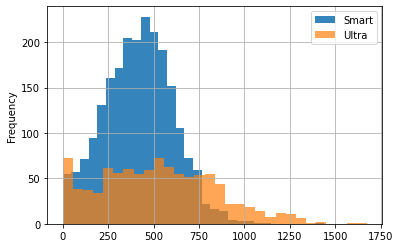

In [30]:
# plot histograms
smart_data['calls_duration'].plot(kind='hist', bins=30, grid=True, legend=True, label='Smart', alpha=0.9)
ultra_data['calls_duration'].plot(kind='hist', bins=30, grid=True, legend=True, label='Ultra', alpha=0.7)

Длительность звонков в месяц для тарифа "Смарт" распределена нормально, а для тарифа "Ультра" – распределение более "сплющено".

Построим гистограммы для количества сообщений.

<AxesSubplot:ylabel='Frequency'>

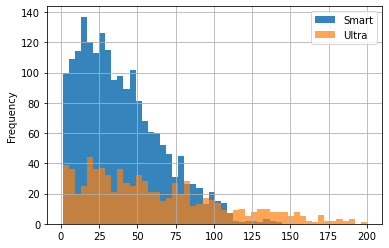

In [31]:
# plot histograms
smart_data['messages_number'].plot(xlabel='Number of messages', kind='hist', bins=50, range=(1, 200), grid=True, legend=True, label='Smart', alpha=0.9)
ultra_data['messages_number'].plot(kind='hist', bins=50, range=(1, 200), grid=True, legend=True, label='Ultra', alpha=0.7)

Количество сообщений в месяц для тарифа "Смарт" распределено по Пуассону, а для "Ультра" распределение опять более сглаженное.

Построим такие же гистограммы для интернет-траффика.

<AxesSubplot:ylabel='Frequency'>

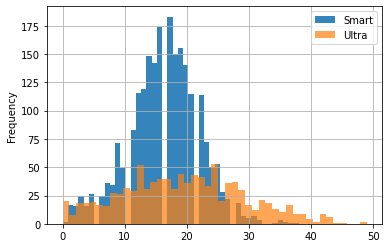

In [32]:
# plot histograms
smart_data['gb_used'].plot(kind='hist', bins=45, grid=True, legend=True, label='Smart', alpha=0.9)
ultra_data['gb_used'].plot(kind='hist', bins=45, grid=True, legend=True, label='Ultra', alpha=0.7)

Распределение для тарифа "Смарт" опять нормальное (только почему-то оно не непрерывно), а для тарифа "Ультра" опять сильно сглажено.

Построим гистограммы для помесячной выручки.

<AxesSubplot:ylabel='Frequency'>

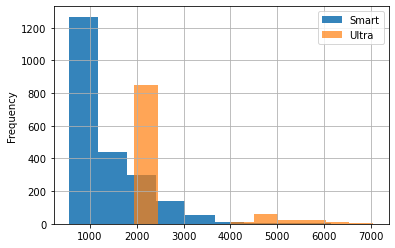

In [33]:
# plot histograms
smart_data['monthly_revenue'].plot(kind='hist', bins=10, grid=True, legend=True, label='Smart', alpha=0.9)
ultra_data['monthly_revenue'].plot(kind='hist', bins=10, grid=True, legend=True, label='Ultra', alpha=0.7)

Видно, что большая часть людей не платит за услуги сверх пакетного тарифа, но, если для тарифа "Смарт" пользование услугами сверх пакетного тарифа происходит довольно часто, то для тарифа "Ультра" такого почти не случается (только для людей тратящих очень много денег: более 4000 руб.).

Также построим графики выручки по месяцам в разрезе по тарифам.

<AxesSubplot:xlabel='month'>

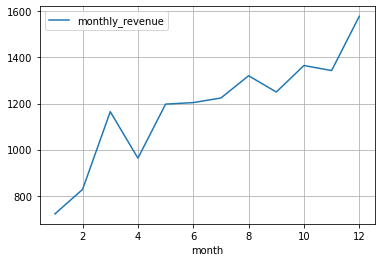

In [34]:
smart_data.pivot_table(index='month', values='monthly_revenue', aggfunc='mean').plot(grid=True)

<AxesSubplot:title={'center':'"Ultra" monthly revenue'}, xlabel='month', ylabel='monthly revenue'>

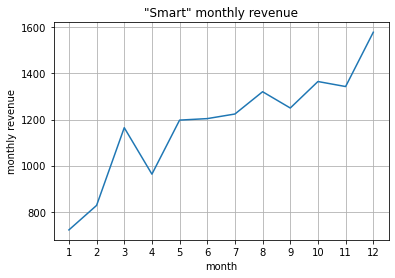

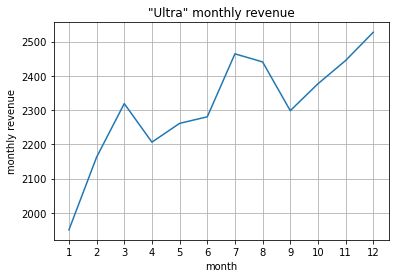

In [35]:
smart_data.pivot_table(index='month', values='monthly_revenue', aggfunc='mean').plot(grid=True, ylabel='monthly revenue', title='"Smart" monthly revenue', legend=False, xticks=range(1, 13))

ultra_data.pivot_table(index='month', values='monthly_revenue', aggfunc='mean').plot(grid=True, ylabel='monthly revenue', title='"Ultra" monthly revenue', legend=False, xticks=range(1, 13))


Видим, что в среднем выручка растет.

<AxesSubplot:xlabel='month'>

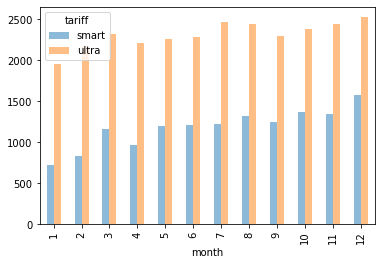

In [36]:
# Комментарий ревьюера 2
(df.pivot_table(index='tariff', columns='month', values='monthly_revenue', aggfunc='mean')
 .T.plot(kind='bar', alpha=0.5)
)
#plt.title('Средняя ежемесячная выручка по 2-м тарифам за год'+ "\n")
#plt.xlabel('Месяц')
#plt.ylabel('Рубли')

### Вывод
Были посчитаны среднее значение, дисперсия и стандартное отклонение, построены гистограммы длительности звонков, количества сообщений, количества использованного интернет-траффика и помесячной выручки. Также были построены графики выручки по месяцам в разрезе по тарифам: по ним видно, что средняя выручка обоих тарифов растет.

## Проверка гипотез

Нам нужно проверить две гипотезы:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

### Проверка гипотезы о равенстве средней выручке тарифов "Ультра" и "Смарт"

Нулевая гипотеза $H_0$: средняя выручка пользователей тарифа "Ультра" равна средней выручке пользователей тарифа "Смарт".

Альтернативная гипотеза $H_1$: средняя выручка пользователей тарифа "Ультра"  не равна средней выручке пользователей тарифа "Смарт".

Так как наши выборки – это генеральные совокупности, то для проверки гипотезы будем использовать метод `ttest_ind`.

In [37]:
# critical p-value
alpha = 0.05 

# t-test
results = st.ttest_ind(smart_data['monthly_revenue'], ultra_data['monthly_revenue'], equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.') 

p-значение: 1.463617294216551e-137
Отвергаем нулевую гипотезу.


Получается, что средняя выручка пользователей двух тарифов не равны. Посчитаем среднее и медиану выручки пользователей "Смарт" и "Ультра".

In [38]:
print(f"Средняя и медианная выручка пользователей тарифа 'Смарт': {smart_data['monthly_revenue'].mean()}, {smart_data['monthly_revenue'].median()}")
print(f"Средняя и медианная выручка пользователей тарифа 'Ультра': {ultra_data['monthly_revenue'].mean()}, {ultra_data['monthly_revenue'].median()}")

Средняя и медианная выручка пользователей тарифа 'Смарт': 1289.9735307312696, 1023.0
Средняя и медианная выручка пользователей тарифа 'Ультра': 2376.243654822335, 1950.0


Как мы видим, и средняя, и медианная выручка пользователей тарифа "Ультра" почти в два раза больше. Значит, он более выгоден для компании.

### Проверка гипотезы о равенстве средней выручке пользователей из Москвы и других городов

Нулевая гипотеза $H_0$: средняя выручка пользователей из Москвы равна средней выручке пользователей из других городов.

Альтернативная гипотеза $H_1$: средняя выручка пользователей из Москвы не равна средней выручке пользователей из других городов.

По той же причине будем использовать метод `ttest_ind`.

In [39]:
# create moscow dataframe and not moscow dataframe
moscow_data = df[df['city'] == 'Москва']
province_data = df[df['city'] != 'Москва']

# critical p-value
alpha = 0.05

# t-test
results = st.ttest_ind(moscow_data['monthly_revenue'], province_data['monthly_revenue'], equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.12416074788267101
Не получилось отвергнуть нулевую гипотезу


Для дополнительного подтверждения нашей гипотезы посчитаем среднее и медианное значение выручки пользователей из Москвы и других регионов.

In [40]:
print(f"Средняя и медианная выручка пользователей из Москвы: {moscow_data['monthly_revenue'].mean()}, {moscow_data['monthly_revenue'].median()}")
print(f"Средняя и медианная выручка пользователей из других регионов: {province_data['monthly_revenue'].mean()}, {province_data['monthly_revenue'].median()}")

Средняя и медианная выручка пользователей из Москвы: 1682.9656301145662, 1750.0
Средняя и медианная выручка пользователей из других регионов: 1608.7817902420284, 1583.0


Среднее в Москве и в регионах почти не отличаются, по медиане отличие больше заметно, но все равно не так сильно, чтобы были основания отвергать нулевую гипотезу.

### Вывод

Было проверено две гипотезы с помощью t-теста на четырех генеральных выборках разных размеров:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Первая гипотеза была подтверждена, вторая – опровегнута.

## Общий вывод

Были изучены и подготовлены к анализу пять датафреймов с данными пользователей с тарифами "Смарт" и "Ультра":
- данные были приведены к нужному типу, были исправлены ошибки;
- для каждого пользователя были посчитаны количество сделанных звонков и израсходованных минут разговора по месяцам, количество отправленных сообщений по месяцам, объем израсходованного интернет-трафика по месяцам, а также помесячная выручка;
- были посчитаны среднее значение, дисперсия и стандартное отклонение для помесячной длительности звонков, количества сообщений и израсходованного интернет-траффика, а также для этих величин и помесячной выручки были построены гистограммы; в частности, выяснилось, что пользователи тарифа "Ультра" больше, чем пользователи тарифа "Смарт", пользуются всеми перечисленными услугами, также выяснилось, что пользователи тарифа "Ультра" почти не используют услугу сверх тарифного пакета;
- были сформулированы и проверены две гипотезы: 1. средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются; 2. средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. Первая гипотеза была подтверждена, вторая – опровегнута.
- были посчитаны средние выручки пользователей тарифа "Ультра" (2376 руб.) и "Смарт" (1290 руб.): тариф "Ультра" оказался выгоднее для компании.